In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


# focus metrics
met_focus = ['semblance', 'TR', 'MSE_field']
# get the test group of predicted results
#       0          1     2            3             4    5 
'pred=hpyerp_test-bp-AGC=3+15-rg=5+5.0+50.0+50-cluK=12.0-15'

root_path = '/home/htwang/result/Cascade_RMO_Results/z_best_250207/MSFSegNet-31+51-32-tanh-01011-bs8-lr1.0e-04-BCE-SGD-S1'
pred_list = [name for name in os.listdir(root_path) if 'hpyerp_test' in name ]

result_list = []
# agc win_k bw_data bw_para clu_eps min_len 
for pred in pred_list:
    pred_path = os.path.join(root_path, pred)
    config_list = pred.split('-')
    agc = config_list[2].split('=')[1]
    win_k, bw_data, bw_para, _ = list(map(float, config_list[3].split('=')[1].split('+')))
    clu_eps = float(config_list[4].split('=')[1])
    min_len = float(config_list[5])
    met_df = pd.read_csv(os.path.join(pred_path, 'test_results.csv'))[met_focus].values[0]
    result_list.append([agc, win_k, bw_data, bw_para, clu_eps, min_len, *met_df])

result_df = pd.DataFrame(result_list, columns=['agc', 'win_k', 'bw_data', 'bw_para', 'clu_eps', 'min_len', *met_focus])

os.makedirs('figs', exist_ok=True)

semb_s = 0.7610568721184292
tr_s = 0.4364647027639821
mse_s = 0.06387699245433644
semb_m = 0.25982470262239915

key_names = ['agc', 'win_k', 'bw_data', 'bw_para', 'min_len', 'clu_eps']
default_comb = ['9+15', 5,    5,       50,     15,     12]
default_dict = {k:v for k, v in zip(key_names, default_comb)}


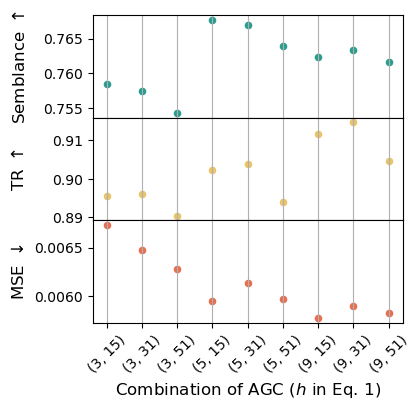

In [138]:

# agc
import itertools
group_results = []
met_focus = ['semblance', 'TR', 'MSE_field']
# agc feature 
for k1, k2 in itertools.product([3, 5, 9], [15, 31, 51]):
    comb_cp = default_dict.copy()
    condi_k = np.ones(len(result_df), dtype=bool)
    comb_cp['agc'] = '%d+%d'%(k1, k2)
    for name, value in comb_cp.items():
        condi_k = condi_k & (result_df[name] == value)
    met_res = result_df[condi_k][met_focus].values[0]
    if len(met_res) > 0:
        group_results.append([comb_cp['agc'], *result_df[condi_k][met_focus].values[0]])
group_results = np.array(group_results)
x = ['(%s, %s)' % tuple(comb.split('+'))  for comb in group_results[:, 0]]
y1 = group_results[:, 1].astype(float)
y2 = group_results[:, 2].astype(float)
y3 = group_results[:, 3].astype(float)


fig = plt.figure(figsize=(4, 4))
gs = fig.add_gridspec(3, 1, hspace=0)  # 创建3行1列的网格，并去除纵向间隔
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_ylabel(r'Semblance $\uparrow$', labelpad=11, fontsize=12)
ax1.scatter(x, y1, label=r'Cascade', color='#2a9d8f', marker='o', s=20)
ax1.grid(True, axis='x')
# ax1.axhline(y=semb_s, color='#2a9d8f', linestyle='--', label=r'Semblance')
# ax1.axhline(y=semb_m, color='red', linestyle='--', label=r'Manual')

ax2 = fig.add_subplot(gs[1, 0])
ax2.set_ylabel(r'TR $\uparrow$', labelpad=18, fontsize=12)
ax2.scatter(x, y2, label=r'Cascade', color='#e9c46a', marker='o', s=20)
ax2.grid(True, axis='x')
# ax2.axhline(y=tr_s, color='#e9c46a', linestyle='--', label=r'Semblance')

ax3 = fig.add_subplot(gs[2, 0])
ax3.set_ylabel(r'MSE $\downarrow$', labelpad=5, fontsize=12)
ax3.grid(True, axis='x')
ax3.scatter(x, y3, label=r'Cascade', color='#e76f51', marker='o', s=20)
# ax3.axhline(y=mse_s, xmin=0, xmax=1, color='#e76f51', linestyle='--', label=r'Semblance')

# 去除第二和第三个子图的x轴标签
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax3.set_xlabel(r'Combination of AGC ($h$ in Eq. 1)', fontsize=12)
ax3.tick_params(axis='x', rotation=45)
fig.savefig('figs/ep_dis_1_agc.pdf', dpi=300, bbox_inches='tight', pad_inches=0.02)

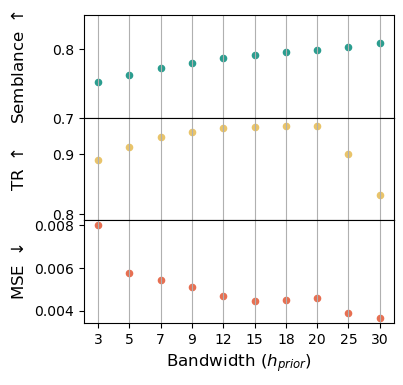

In [ ]:
# win_k
group_results = []
met_focus = ['semblance', 'TR', 'MSE_field']
# win_k feature 
for win_k in [3, 5, 7, 9, 12, 15, 18, 20, 25, 30]: 
    comb_cp = default_dict.copy()
    condi_k = np.ones(len(result_df), dtype=bool)
    comb_cp['win_k'] = win_k
    for name, value in comb_cp.items():
        condi_k = condi_k & (result_df[name] == value)
    met_res = result_df[condi_k][met_focus].values[0]
    if len(met_res) > 0:
        group_results.append([comb_cp['win_k'], *result_df[condi_k][met_focus].values[0]])
group_results = np.array(group_results)
x = group_results[:, 0].astype(int).astype(str)
y1 = group_results[:, 1].astype(float)
y2 = group_results[:, 2].astype(float)
y3 = group_results[:, 3].astype(float)


fig = plt.figure(figsize=(4, 4))
gs = fig.add_gridspec(3, 1, hspace=0)  # 创建3行1列的网格，并去除纵向间隔
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_ylabel(r'Semblance $\uparrow$', labelpad=18, fontsize=12)
ax1.scatter(x, y1, label=r'Cascade', color='#2a9d8f', marker='o', s=20)
ax1.grid(True, axis='x')
ax1.set_ylim(0.7, 0.85)
# ax1.axhline(y=semb_s, color='#2a9d8f', linestyle='--', label=r'Semblance')
# ax1.axhline(y=semb_m, color='red', linestyle='--', label=r'Manual')

ax2 = fig.add_subplot(gs[1, 0])
ax2.set_ylabel(r'TR $\uparrow$', labelpad=18, fontsize=12)
ax2.scatter(x, y2, label=r'Cascade', color='#e9c46a', marker='o', s=20)
ax2.grid(True, axis='x')
ax2.set_ylim(0.79, 0.96)
# ax2.axhline(y=tr_s, color='#e9c46a', linestyle='--', label=r'Semblance')

ax3 = fig.add_subplot(gs[2, 0])
ax3.set_ylabel(r'MSE $\downarrow$', labelpad=5, fontsize=12)
ax3.grid(True, axis='x')
ax3.scatter(x, y3, label=r'Cascade', color='#e76f51', marker='o', s=20)
# ax3.axhline(y=mse_s, xmin=0, xmax=1, color='#e76f51', linestyle='--', label=r'Semblance')

# 去除第二和第三个子图的x轴标签
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax3.set_xlabel(r'Bandwidth ($h_{prior}$ in Eq. 12)', fontsize=12)
fig.savefig('figs/ep_dis_2_win_k.pdf', dpi=300, bbox_inches='tight', pad_inches=0.02)

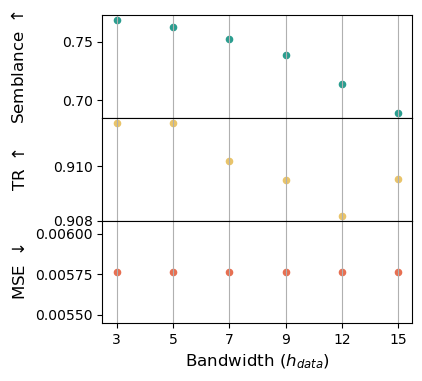

In [ ]:
# bw_data
group_results = []
met_focus = ['semblance', 'TR', 'MSE_field']
# bw_data feature 
for bw_data in [3, 5, 7, 9, 12, 15]: 
    comb_cp = default_dict.copy()
    condi_k = np.ones(len(result_df), dtype=bool)
    comb_cp['bw_data'] = bw_data
    for name, value in comb_cp.items():
        condi_k = condi_k & (result_df[name] == value)
    met_res = result_df[condi_k][met_focus].values[0]
    if len(met_res) > 0:
        group_results.append([comb_cp['bw_data'], *result_df[condi_k][met_focus].values[0]])
group_results = np.array(group_results)
x = group_results[:, 0].astype(int).astype(str)
y1 = group_results[:, 1].astype(float)
y2 = group_results[:, 2].astype(float)
y3 = group_results[:, 3].astype(float)


fig = plt.figure(figsize=(4, 4))
gs = fig.add_gridspec(3, 1, hspace=0)  # 创建3行1列的网格，并去除纵向间隔
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_ylabel(r'Semblance $\uparrow$', labelpad=25, fontsize=12)
ax1.scatter(x, y1, label=r'Cascade', color='#2a9d8f', marker='o', s=20)
ax1.grid(True, axis='x')
# ax1.set_ylim(0.7, 0.85)
# ax1.axhline(y=semb_s, color='#2a9d8f', linestyle='--', label=r'Semblance')
# ax1.axhline(y=semb_m, color='red', linestyle='--', label=r'Manual')

ax2 = fig.add_subplot(gs[1, 0])
ax2.set_ylabel(r'TR $\uparrow$', labelpad=18, fontsize=12)
ax2.scatter(x, y2, label=r'Cascade', color='#e9c46a', marker='o', s=20)
ax2.grid(True, axis='x')
# ax2.axhline(y=tr_s, color='#e9c46a', linestyle='--', label=r'Semblance')

ax3 = fig.add_subplot(gs[2, 0])
ax3.set_ylabel(r'MSE $\downarrow$', labelpad=5, fontsize=12)
ax3.grid(True, axis='x')
ax3.scatter(x, y3, label=r'Cascade', color='#e76f51', marker='o', s=20)
# ax3.axhline(y=mse_s, xmin=0, xmax=1, color='#e76f51', linestyle='--', label=r'Semblance')

# 去除第二和第三个子图的x轴标签
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax3.set_xlabel(r'Bandwidth ($h_{data}$ in Eq. 15)', fontsize=12)
fig.savefig('figs/ep_dis_3_h_data.pdf', dpi=300, bbox_inches='tight', pad_inches=0.02)

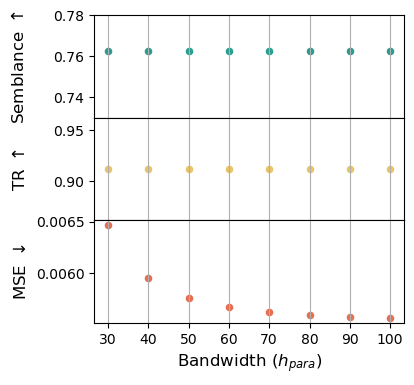

In [ ]:
# bw_para
group_results = []
met_focus = ['semblance', 'TR', 'MSE_field']
# bw_para feature 
for bw_para in [30, 40, 50, 60, 70, 80, 90, 100]: 
    comb_cp = default_dict.copy()
    condi_k = np.ones(len(result_df), dtype=bool)
    comb_cp['bw_para'] = bw_para
    for name, value in comb_cp.items():
        condi_k = condi_k & (result_df[name] == value)
    met_res = result_df[condi_k][met_focus].values[0]
    if len(met_res) > 0:
        group_results.append([comb_cp['bw_para'], *result_df[condi_k][met_focus].values[0]])
group_results = np.array(group_results)
x = group_results[:, 0].astype(int).astype(str)
y1 = group_results[:, 1].astype(float)
y2 = group_results[:, 2].astype(float)
y3 = group_results[:, 3].astype(float)

fig = plt.figure(figsize=(4, 4))
gs = fig.add_gridspec(3, 1, hspace=0)  # 创建3行1列的网格，并去除纵向间隔
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_ylabel(r'Semblance $\uparrow$', labelpad=19, fontsize=12)
ax1.scatter(x, y1, label=r'Cascade', color='#2a9d8f', marker='o', s=20)
ax1.grid(True, axis='x')
ax1.set_ylim(0.73, 0.78)
# ax1.axhline(y=semb_s, color='#2a9d8f', linestyle='--', label=r'Semblance')
# ax1.axhline(y=semb_m, color='red', linestyle='--', label=r'Manual')

ax2 = fig.add_subplot(gs[1, 0])
ax2.set_ylabel(r'TR $\uparrow$', labelpad=18, fontsize=12)
ax2.scatter(x, y2, label=r'Cascade', color='#e9c46a', marker='o', s=20)
ax2.grid(True, axis='x')
# ax2.axhline(y=tr_s, color='#e9c46a', linestyle='--', label=r'Semblance')

ax3 = fig.add_subplot(gs[2, 0])
ax3.set_ylabel(r'MSE $\downarrow$', labelpad=5, fontsize=12)
ax3.grid(True, axis='x')
ax3.scatter(x, y3, label=r'Cascade', color='#e76f51', marker='o', s=20)
# ax3.axhline(y=mse_s, xmin=0, xmax=1, color='#e76f51', linestyle='--', label=r'Semblance')

# 去除第二和第三个子图的x轴标签
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax3.set_xlabel(r'Bandwidth ($h_{para}$ in Eq. 15)', fontsize=12)
fig.savefig('figs/ep_dis_4_h_para.pdf', dpi=300, bbox_inches='tight', pad_inches=0.02)

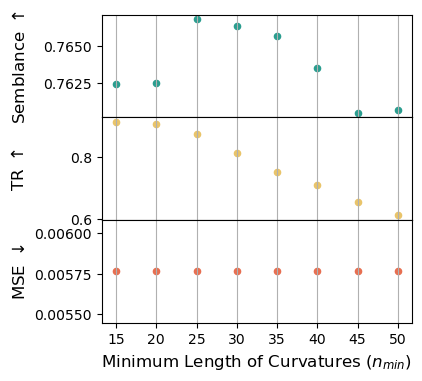

In [144]:
# min_len
group_results = []
met_focus = ['semblance', 'TR', 'MSE_field']
# min_len feature 
for min_len in [15, 20, 25, 30, 35, 40, 45, 50]: 
    comb_cp = default_dict.copy()
    condi_k = np.ones(len(result_df), dtype=bool)
    comb_cp['min_len'] = min_len
    for name, value in comb_cp.items():
        condi_k = condi_k & (result_df[name] == value)
    try:
        met_res = result_df[condi_k][met_focus].values[0]
    except:
        continue
    if len(met_res) > 0:
        group_results.append([comb_cp['min_len'], *result_df[condi_k][met_focus].values[0]])
group_results = np.array(group_results)
x = group_results[:, 0].astype(int).astype(str)
y1 = group_results[:, 1].astype(float)
y2 = group_results[:, 2].astype(float)
y3 = group_results[:, 3].astype(float)

fig = plt.figure(figsize=(4, 4))
gs = fig.add_gridspec(3, 1, hspace=0)  # 创建3行1列的网格，并去除纵向间隔
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_ylabel(r'Semblance $\uparrow$', labelpad=11, fontsize=12)
ax1.scatter(x, y1, label=r'Cascade', color='#2a9d8f', marker='o', s=20)
ax1.grid(True, axis='x')

ax2 = fig.add_subplot(gs[1, 0])
ax2.set_ylabel(r'TR $\uparrow$', labelpad=31, fontsize=12)
ax2.scatter(x, y2, label=r'Cascade', color='#e9c46a', marker='o', s=20)
ax2.grid(True, axis='x')

ax3 = fig.add_subplot(gs[2, 0])
ax3.set_ylabel(r'MSE $\downarrow$', labelpad=5, fontsize=12)
ax3.grid(True, axis='x')
ax3.scatter(x, y3, label=r'Cascade', color='#e76f51', marker='o', s=20)

# 去除第二和第三个子图的x轴标签
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax3.set_xlabel(r'Minimum Length of Curvatures ($n_{{min}}$)', fontsize=12)
fig.savefig('figs/ep_dis_5_min_len.pdf', dpi=300, bbox_inches='tight', pad_inches=0.02)

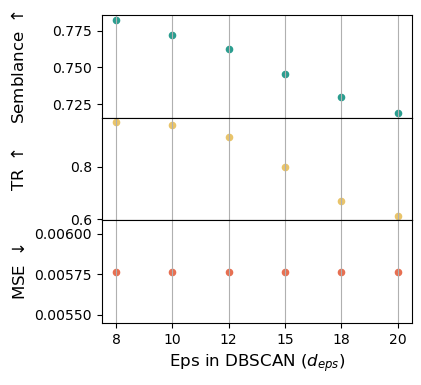

In [145]:
# clu_eps
group_results = []
met_focus = ['semblance', 'TR', 'MSE_field']
# clu_eps feature 
for clu_eps in [8, 10, 12, 15, 18, 20]: 
    comb_cp = default_dict.copy()
    condi_k = np.ones(len(result_df), dtype=bool)
    comb_cp['clu_eps'] = clu_eps
    for name, value in comb_cp.items():
        condi_k = condi_k & (result_df[name] == value)
    met_res = result_df[condi_k][met_focus].values[0]
    if len(met_res) > 0:
        group_results.append([comb_cp['clu_eps'], *result_df[condi_k][met_focus].values[0]])
group_results = np.array(group_results)
x = group_results[:, 0].astype(int).astype(str)
y1 = group_results[:, 1].astype(float)
y2 = group_results[:, 2].astype(float)
y3 = group_results[:, 3].astype(float)

fig = plt.figure(figsize=(4, 4))
gs = fig.add_gridspec(3, 1, hspace=0)  # 创建3行1列的网格，并去除纵向间隔
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_ylabel(r'Semblance $\uparrow$', labelpad=18, fontsize=12)
ax1.scatter(x, y1, label=r'Cascade', color='#2a9d8f', marker='o', s=20)
ax1.grid(True, axis='x')

ax2 = fig.add_subplot(gs[1, 0])
ax2.set_ylabel(r'TR $\uparrow$', labelpad=31, fontsize=12)
ax2.scatter(x, y2, label=r'Cascade', color='#e9c46a', marker='o', s=20)
ax2.grid(True, axis='x')
# ax2.axhline(y=tr_s, color='#e9c46a', linestyle='--', label=r'Semblance')

ax3 = fig.add_subplot(gs[2, 0])
ax3.set_ylabel(r'MSE $\downarrow$', labelpad=5, fontsize=12)
ax3.grid(True, axis='x')
ax3.scatter(x, y3, label=r'Cascade', color='#e76f51', marker='o', s=20)
# ax3.axhline(y=mse_s, xmin=0, xmax=1, color='#e76f51', linestyle='--', label=r'Semblance')

# 去除第二和第三个子图的x轴标签
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax3.set_xlabel(r'Eps in DBSCAN ($d_{eps}$)', fontsize=12)
fig.savefig('figs/ep_dis_6_clu_eps.pdf', dpi=300, bbox_inches='tight', pad_inches=0.02)